##連結雲端硬碟指令



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##人工智慧與雲端運算(股票預測)

---





In [ ]:
# 安裝 Streamlit 函式庫
!pip install -q streamlit
# 安裝 localtunnel 函式庫
!npm audit fix
!npm install localtunnel
# 安裝所需的套件
# pip install yfinance pandas numpy matplotlib tensorflow plotly

In [ ]:
# 安裝 Streamlit 函式庫
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed

現在時間： 2024-01-04 03:38:15.457495
5年前時間：2019-01-04 03:38:15.457320



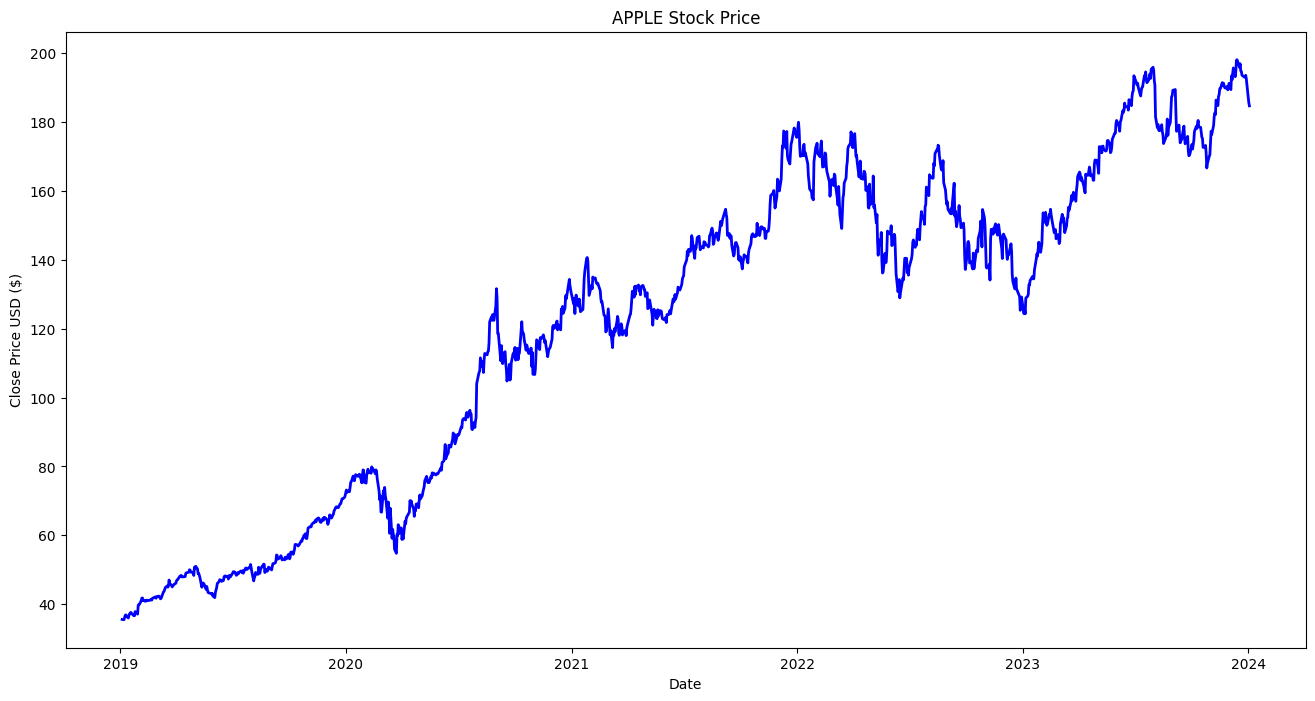

             Adj Close
Date                  
2019-01-04   35.575394
2019-01-07   35.496208
2019-01-08   36.172863
2019-01-09   36.787148
2019-01-10   36.904732
...                ...
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999
2024-01-02  185.639999
2024-01-03  184.714996

[1258 rows x 1 columns]
x_train shape: (947, 60, 1)
y_train shape: (947,)
x_test shape: (251, 60, 1)
y_test shape: (251,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)           

<ipython-input-9-4325df7c8804>:198: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




ok


In [ ]:
### Define the question：使用yahoo股市(yfinance)的股票歷史數據集訓練一個LSTM的模型，並預測股票，將預測結果圖示化，再做成Streamlit Web app
# Colab https://colab.research.google.com/drive/1RlzRnVErBRqGv_tL5zMAkvlkr-QhBGxW?hl=zh-tw#scrollTo=Qwh4qD3zjpUT&uniqifier=9
# github
# 安裝所需的套件
# 安裝到的 streamlit yfinance plotly tensorflow altair PyQt5  -> pip install "library"
#         sklearn ->pip install -U scikit-learn

# pip install yfinance pandas numpy matplotlib tensorflow plotly


## 使用yfinance取得歷史股票
# 參考 https://yhhuang1966.blogspot.com/2022/09/python-yfinance.html -> 的 5. 用 yf.download() 下載股票日收盤價量資料 :
#     https://365datascience.com/tutorials/python-tutorials/predictive-model-python/#3 -> 的Step 3: Explore the Dataset中的function將數據集顯示出來並查看訓練模型所需的步驟
import yfinance as yf
import pandas as pd
import datetime
from dateutil.relativedelta import *
# import pytz
from matplotlib import pyplot as plt
import streamlit as st

# print("\n{}".format("Install the require library is ok."))

# 獲取多隻股票從'start time' ~ 'end time'之間的歷史紀錄
def GetStockData(symbol, start_data, end_data):
    df = pd.DataFrame(yf.download(symbol, start=start_data,end=end_data  , group_by='ticker', interval='1d')['Adj Close'])
    # df = yf.download(symbol, start=start_data,end=end_data, group_by='ticker', interval='1d')

    # pandas.DataFrame 處理雙維度或多欄位的資料，類似於Excel的表格  https://www.learncodewithmike.com/2020/11/python-pandas-dataframe-tutorial.html
    # symbol 股票代碼, start 起始日期, end 結束日期, period 間期, interval, 頻率，在k線圖中的一條線
    # 顯示資料集中的資料
    # df.info()     #每列的資料類型、列數、記憶體使用情況以及資料集中的記錄數
    # df.describe() #資料集的記錄數和列數
    return df

# 預獲取的股票代碼
stocks = ("AAPL", "TSLA", "GOOG") # 更改成用input的方式
stocks = list(stocks)
# data = ""
# data = str(input("Please enter the stock market you want to increase："))
data = st.text_input("Please enter the stock market you want to increase：")
# https://docs.streamlit.io/library/api-reference/widgets/st.text_input

#若想查詢的股市不在stocks可以增加，若不需要增加就直接按enter
if(data not in stocks or data != ""):
  stocks.append(data)

stocks = tuple(stocks)
# 選取所要觀察的股票
symbol = st.selectbox('Select a stock', stocks)
# symbol = "AAPL"#, "TSLA", "GOOG") # 更改成用input的方式


# 起始日期為五年前
start_time = datetime.datetime.now() - relativedelta(years=5) + datetime.timedelta(hours=8)
# 結束的期間為當下
end_time = datetime.datetime.now() + datetime.timedelta(hours=8)
# 因為 datetime.datetime.now() 的時間是「英國倫敦格林威治」，格林威治的經度為0˚台灣為東經120˚，15˚為一個時區差一個小時，120/15=8，因此台灣比格林威治早8小時
# https://tw.piliapp.com/time-now/ -> 用於觀察格林威治與台灣的時間差

# 股票的歷史資料集
stock_data = GetStockData(symbol, start_time, end_time)
stock_data.tail(10)
# print(stock_data)
# open 開盤價, heigh最高的股價, low最低的股價, close收盤價, Adjusted Closing調整後的股價, volume成交量

# print("\n{}".format("Getting the yahoo data set is ok."))

print("\n現在時間： {}\n5年前時間：{}\n".format(end_time, start_time))

## 繪製收盤圖
#https://thomas-20.medium.com/plot-finance-data-with-python-898b652c1716 -> 的繪圖部分，將由yfinance所收集到的數據集圖示化
def PlotPrice(ticker, color, head):
    plt.figure(figsize=(16,8))
    plt.plot(ticker, color=color, linewidth=2)
    plt.title(head)
    plt.ylabel('Close Price USD ($)')
    plt.xlabel('Date')
    plt.show()

Stock_Plot = PlotPrice(stock_data, 'blue', 'APPLE Stock Price')
print(stock_data)

## 整理資料集
#  參考 https://thomas-20.medium.com/plot-finance-data-with-python-898b652c1716
#      https://ithelp.ithome.com.tw/articles/10240494
#      https://apmonitor.com/do/index.php/Main/LSTMNetwork -> what is the LSTM Networks
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 定義最大與最小範圍
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# 從資料中提取‘收盤’列
close_prices = stock_data['Adj Close'] #此處是取得收盤的數據
# 從‘收盤’列中以NumPy陣列的形式獲取值
values = close_prices.values
# 建立一個MinMaxScaler物件，並將值縮放到範圍[0, 1]
#https://ithelp.ithome.com.tw/articles/10240494 ->的 MinMaxScaler 最小最大值標準化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values.reshape(-1, 1))

# print("\n{}".format("Organize pre-processing data is ok."))

## 分割訓練集數量
#https://medium.com/@iqra1804/time-series-forecasting-using-lstm-an-introduction-with-code-explanations-c5c2e8ca137d ->中的分割數據集以及部分所train model
# 訓練資料數量
train_data_size = math.ceil(len(values)*0.8) # 80%訓練資料，67
# 測試資料數量
test_data_size = int(len(values) - train_data_size)
# print(train_data_size, test_data_size)
# 將收集到的數據集分割成訓練集與測試集，此在區分的資料是「透過MinMaxScaler物件，將值縮放至範圍[0, 1]」過後的資料也就是scaled_data，不是stock_data，因為它是尚未整理過的數據
train_data, test_data = scaled_data[0:train_data_size], scaled_data[train_data_size-60:len(stock_data)]

# 將訓練輸入和輸出轉換為NumPy陣列
def PrepareListData(train, test, window_size):
    # # 將視窗的點數儲存為序列，Split Into Samples
    x_train, y_train, x_test = [], [], []

    for i in range(window_size, len(train)):
      x_train.append(train[i - window_size: i, 0])
      y_train.append(train[i, 0])

    for i in range(window_size, len(test)):
        x_test.append(test_data[i - window_size: i, 0])

    # 將輸入和輸出轉換為NumPy陣列
    return np.array(x_train), np.array(y_train),  np.array(x_test)

## 分割訓練集和測試集
window_size = 60
# 分割訓練與測試集
x_train, y_train, x_test = PrepareListData(train_data, test_data, window_size)
#重塑資料為3D，以便與LSTM模型一起使用
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = values[train_data_size:]

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# print("\n{}".format("Split the train and test data set is ok."))

# 2023/12/30 4:20完成， 12/31  2:30修改完成-----------------------------------------------------------------------------

## 建構與訓練模型
#https://ithelp.ithome.com.tw/articles/10206312
#https://www.educative.io/answers/time-series-prediction-using-lstm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## 建立LSTM模型
# https://pythonalgos.com/2021/12/31/long-short-term-memory-lstm-in-keras/
def build_lstm_model(window_size):
    model = Sequential() # 初始化模型
    model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.summary() # 模型總結

    return model

# 建立LSTM模型
lstm_model = build_lstm_model(window_size)
# 訓練LSTM模型
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, batch_size= 1, epochs=10)

# print("\n{}".format("Build and Training the LSTM model is ok."))

# 2024/1/2/2:00完成------------------------------------------------------------------------------------------------------

## 驗證模型
#https://www.askpython.com/python/examples/rmse-root-mean-square-error
# 均方根誤差：預測值與真實值之間的均方誤差(MSE)的平方根；均方誤差：預測值與真實值偏差的平方和觀測次數n比值的平方根
predictions = lstm_model.predict(x_test) # 對x_tes呼叫模型的預測方法來產生預測
predictions = scaler.inverse_transform(predictions) # 使用inverse_transform將這些預測轉換回其原始比例
rmse = np.sqrt(np.mean(predictions - y_test)**2) # 衡量模型在測試資料上的表現
print("\n均方根誤差：", rmse)
# RMSE = sqart(Sigma n, i=1 (((predicted value - observe value) ** 2) / n))
# https://docs.oracle.com/cloud/help/zh_TW/pbcs_common/PFUSU/insights_metrics_RMSE.htm#PFUSU-GUID-FD9381A1-81E1-4F6D-8EC4-82A6CE2A6E74
# 均方根誤差=預測值與真實值之間的均方誤差(MSE)的平方根

## 做出預測
#https://medium.com/@prajjwalchauhan94017/stock-prediction-and-forecasting-using-lstm-long-short-term-memory-9ff56625de73 -> 的 Prediction and checking performance matrix 與 Graph Plotting
data = stock_data.filter(['Adj Close'])
train = data[:train_data_size]
validation = data[train_data_size:]
validation['predictions'] = predictions
train.reset_index(inplace = True)
validation.reset_index(inplace = True)

# print("\n{}".format("Make prediction is ok."))

## Visualize using Plotly
#https://plotly.com/python/
# https://www.analyticsvidhya.com/blog/2021/10/interactive-plots-in-python-with-plotly-a-complete-guide/#Use_of_Python_in_Data_Visualization
# https://medium.com/@prajjwalchauhan94017/stock-prediction-and-forecasting-using-lstm-long-short-term-memory-9ff56625de73
# https://plotly.com/python/colorscales/ -> Color

## 使用這兩個來繪畫Plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.Date, y=train['Adj Close'], mode='lines', marker=dict(color='blue'), name="Actual Price (train)"))
fig.add_trace(go.Scatter(x=validation.Date, y=validation['Adj Close'], mode='lines',marker=dict(color='orange'), name="Actual Price (test)"))
fig.add_trace(go.Scatter(x=validation.Date, y=validation['predictions'], mode='lines', marker=dict(color='grey'), name="Predicted Price"))
fig.update_layout(
        title="使用LSTM預測{}股市".format(symbol),
        xaxis_title="Date-Time",
        yaxis_title="Values",
        legend_title="Legend")
fig.show()

# print("\n{}".format("Make prediction form the Plytly Visualization is ok."))

# plt.figure(figsize=(16, 8))
# plt.title("使用LSTM預測{}股市".format(symbol))
# plt.xlabel('Data', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Adj Close'])
# plt.plot(validation[['Adj Close', 'predictions']])
# plt.legend('Train', 'Val', 'Predictions', loc='loser right')
# plt.show()

# 2024/1/2/4:20完成------------------------------------------------------------------------------------------------------


## Streamlit Web App
#https://www.youtube.com/watch?v=e_OPmGjkAVs -> 的 how to Create Streamlit App form Colab Notebook

# write to the next Coding block


# ---------------------------------------------------------------------------------------------------------
# 前面訓練與建構模型使用colab，後面Streamlit用raspberry pi

# 透過yfinance套件取得yahoo股票股市的數據，
# 使用LSTM處理預處理的資料，
# 並透過LSTM訓練模型，
# 做出預測之後在使用Plotly做出視覺化預測

# ok 安裝所需的套件
# ok 搜集數據集
# ok 整理預處理資料
# ok 建立&訓練LSTM模型
# ok 做出預測
# ok Plotly視覺化預測結果
# Streamlit建立Web app

##### 2024/1/3 1:45 Question：使用Streamlit在到Build the LSTM model時 Streamlit會出現『illegal hardware instruction』，app.py可以進行測試，該處為完整版

# 在Colab建立用tensorflow建立 LSTM model是可以的，但因為在mac m1 使用tensorflow 會出現 "illegal hardware instruction"，所以晚上用raspberry pi 是看看

## how to run the Streanlit in Colab https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=ZAyqQCQVOoxC

## 安裝 Streamlit 函式庫
# !pip install -q streamlit
## 安裝 localtunnel 函式庫
# !npm install localtunnel

## Create a streamlit app
# % %writefile app.py
## Make Streamlit App
import streamlit as st
import yfinance as yf
st.title("Stock Prediction App")


# st.write("""###{}""".format(symbol))
# user_input_stock = st.text_input(label = "Please enter the Stock：")
# user_input_stock = input("Please enter the Stock：")
# dataTicker = yf.Ticker(user_input_stock)
# dataTicker.history(period="1d")
# dataTicker.info['longBusinessSummary']
# st.write(dataTicker.info['longBusinessSummary'])
# # dataframe
# st.write(stock_data)
# # st.line_chat(yf.Ticker(symbol).history(period="1d").values)
# st.header("Bek Brace \n code along with me ... ")


## 在後台執行Streamlit
# !streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

## Expose the port 8501
# !npx localtunnel --port 8501

print("\nok")





## Streanlit

In [ ]:
## how to run the Streanlit in Colab https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=XTGAizLhOIgC

# 安裝 Streamlit 函式庫
!pip install -q streamlit
# 安裝 localtunnel 函式庫
# !npm install localtunnel
!pip install pyngrok

In [ ]:
 %%writefile app.py
## Make Streamlit App
import streamlit as st
import yfinance as yf
st.write("""###{}""".format(symbol))
# user_input_stock = st.text_input(label = "Please enter the Stock：")
user_input_stock = input("Please enter the Stock：")
dataTicker = yf.Ticker(user_input_stock)
dataTicker.history(period="1d")
dataTicker.info['longBusinessSummary']
st.write(dataTicker.info['longBusinessSummary'])
# dataframe
st.write(stock_data)
# st.line_chat(yf.Ticker(symbol).history(period="1d").values)
st.header("Bek Brace \n code along with me ... ")


Writing app.py


In [ ]:
%%writefile app.py
import streamlit as st
st.title("hello world")

Overwriting app.py


In [ ]:
!streamlit run /content/app.py #&>/content/logs.txt &
#!npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.82.240:8501

  Stopping...
^C
